# **Statistical Analysis-Orientation Session**




## **Introduction**

<p align = "justify"> In this tutorial, we are going to analyze a dataset and apply what we learned through the lecture on this dataset. Following the lecture, two important topics will be covered:

- Descriptive Statistics
- Exploratory Data Analysis


<p align = "justify"> If you are not familiar with the Google Colab environment and do not know how to use it, please check out the instructions shared on Canvas.

<p align = "justify"> We will use the Statsmodels library in this lecture.

<p align = "justify"> Statsmodels is a Python package that allows users to explore data, estimate statistical models, and perform statistical tests. An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator.

Check out [Statsmodel](https://www.statsmodels.org/) to learn more.

<p align = "justify"> Please take note that coding is not required in this lecture. We understand that you might not still be proficient in using Python. You should rather learn the steps and concepts. All the steps here can be implemented using other statistical packages. However, we are using Python as it will be the primary programming language you will be working with throughout your classes and projects at MIT. </p>


### **Dataset**

Filename: Spot_rates.xlsx

Columns:



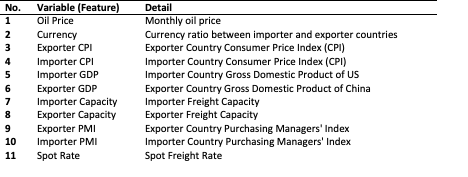


## **Data Preparation**

#### **Import libraries**

First, we will import the required libraries including Numpy, Pandas, Matplotlib, Seaborn, and Scipy. We will be using these libraries for our analysis all over the notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Let's import the dataset to the Colab environment.

In [2]:
#!wget https://www.dropbox.com/s/8olj9c3xqngqf6k/Spot_rates.xlsx

The following code reads the dataset and saves it as a dataframe called df.


In [6]:
df = pd.read_excel('Spot_rates.xlsx')
df

,Date,Spot rate,Oil Price,Currency,Exporter CPI,Importer CPI,Exporter GDP,Importer GDP,Exporter Capacity,Importer Capacity,Exporter PMI,Importer PMI
0,201404,2792,162.18,6.2594,101.80,237.07,15.59,17.43,288600,130400,50.4,54.9
1,201405,2787,164.06,6.2479,102.48,237.90,15.59,17.43,288600,130400,50.8,55.4
2,201406,2531,169.41,6.2038,102.34,238.34,15.59,17.43,288600,130400,51.0,55.3
3,201407,2679,161.55,6.1740,102.29,238.25,16.49,17.72,288600,130400,51.7,57.1
4,201408,3098,154.53,6.1433,101.99,237.85,16.49,17.72,288600,130400,51.1,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60,201904,2312,107.43,6.7349,102.54,255.55,23.75,21.34,345950,161150,50.1,52.8
61,201905,1986,106.04,6.9050,102.74,256.09,23.75,21.34,345950,161150,49.4,52.1
62,201906,2010,93.33,6.8668,102.70,256.14,23.75,21.34,345950,161150,49.4,51.7
63,201907,2273,95.96,6.8841,102.80,256.57,24.69,21.54,345950,161150,49.7,51.2


Let's take a look at the data types in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               65 non-null     int64  
 1   Spot rate          65 non-null     int64  
 2   Oil Price          65 non-null     float64
 3   Currency           65 non-null     float64
 4   Exporter CPI       65 non-null     float64
 5   Importer CPI       65 non-null     float64
 6   Exporter GDP       65 non-null     float64
 7   Importer GDP       65 non-null     float64
 8   Exporter Capacity  65 non-null     int64  
 9   Importer Capacity  65 non-null     int64  
 10  Exporter PMI       65 non-null     float64
 11  Importer PMI       65 non-null     float64
dtypes: float64(8), int64(4)
memory usage: 6.2 KB


In [8]:
df1 = df.drop('Date', axis=1)

Is there any missing value?

In [9]:
df1.isna().any()

Spot rate            False
Oil Price            False
Currency             False
Exporter CPI         False
Importer CPI         False
Exporter GDP         False
Importer GDP         False
Exporter Capacity    False
Importer Capacity    False
Exporter PMI         False
Importer PMI         False
dtype: bool

## **Descriptive Statistics**

Let's check the numerical summaries of data.

- What is the measure of central tendency (location)?



In [11]:
#@title
df1.mean().to_frame().rename({0:"Mean"}, axis=1)

,Mean
Spot rate,2264.523077
Oil Price,94.396308
Currency,6.554925
Exporter CPI,101.868923
Importer CPI,243.914462
Exporter GDP,19.678154
Importer GDP,19.290000
Exporter Capacity,308766.153846
Importer Capacity,146627.692308
Exporter PMI,50.575385


In [12]:
#@title
df1.mode()

,Spot rate,Oil Price,Currency,Exporter CPI,Importer CPI,Exporter GDP,Importer GDP,Exporter Capacity,Importer Capacity,Exporter PMI,Importer PMI
0,1809.0,72.53,6.1127,101.49,241.43,15.06,17.43,292600.0,134500.0,50.1,51.5
1,2010.0,NaN,6.1385,101.51,NaN,15.59,17.72,296400.0,146300.0,NaN,56.6
2,NaN,NaN,6.1432,101.60,NaN,16.10,17.85,297850.0,148400.0,NaN,58.7
3,NaN,NaN,6.1433,101.63,NaN,16.49,17.98,338550.0,159800.0,NaN,59.3
4,NaN,NaN,6.1740,101.75,NaN,16.79,18.22,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
60,NaN,NaN,6.9050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,6.9450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,6.9605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,6.9756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#@title
df1.median().to_frame().rename({0:"Median"}, axis=1)

,Median
Spot rate,2123.0000
Oil Price,89.6900
Currency,6.5899
Exporter CPI,101.8000
Importer CPI,241.7300
Exporter GDP,19.1700
Importer GDP,18.9900
Exporter Capacity,296400.0000
Importer Capacity,146300.0000
Exporter PMI,50.4000


In [16]:
df1.describe()

,Spot rate,Oil Price,Currency,Exporter CPI,Importer CPI,Exporter GDP,Importer GDP,Exporter Capacity,Importer Capacity,Exporter PMI,Importer PMI
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.00000,65.000000,65.000000,65.000000,65.000000
mean,2264.523077,94.396308,6.554925,101.868923,243.914462,19.678154,19.29000,308766.153846,146627.692308,50.575385,54.804615
std,614.955159,27.176860,0.278206,0.490752,6.730691,2.932354,1.23393,22279.210299,11140.642201,0.842250,3.577684
min,1134.000000,47.700000,6.112700,100.760000,233.710000,15.060000,17.43000,288600.000000,130400.000000,49.000000,48.000000
25%,1857.000000,73.770000,6.275300,101.510000,237.940000,17.580000,18.34000,292600.000000,134500.000000,49.900000,51.800000
50%,2123.000000,89.690000,6.589900,101.800000,241.730000,19.170000,18.99000,296400.000000,146300.000000,50.400000,54.900000
75%,2765.000000,106.040000,6.810100,102.280000,250.550000,21.930000,20.51000,338550.000000,159800.000000,51.300000,57.800000
max,3623.000000,169.410000,7.156800,102.900000,256.570000,25.360000,21.54000,345950.000000,161150.000000,52.400000,61.300000


- What is the measure of dispersion?

In [17]:
#@title
df1.var().to_frame().rename({0:"Variance"}, axis=1)

,Variance
Spot rate,3.781698e+05
Oil Price,7.385817e+02
Currency,7.739877e-02
Exporter CPI,2.408379e-01
Importer CPI,4.530220e+01
Exporter GDP,8.598700e+00
Importer GDP,1.522584e+00
Exporter Capacity,4.963632e+08
Importer Capacity,1.241139e+08
Exporter PMI,7.093846e-01


In [18]:
#@title
df1.std().to_frame().rename({0:"Std"}, axis=1)

,Std
Spot rate,614.955159
Oil Price,27.176860
Currency,0.278206
Exporter CPI,0.490752
Importer CPI,6.730691
Exporter GDP,2.932354
Importer GDP,1.233930
Exporter Capacity,22279.210299
Importer Capacity,11140.642201
Exporter PMI,0.842250


In [19]:
#@title
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
IQR.to_frame().rename({0:"IQR"}, axis=1)

,IQR
Spot rate,908.0000
Oil Price,32.2700
Currency,0.5348
Exporter CPI,0.7700
Importer CPI,12.6100
Exporter GDP,4.3500
Importer GDP,2.1700
Exporter Capacity,45950.0000
Importer Capacity,25300.0000
Exporter PMI,1.4000


## **Exploratory Data Analysis**

#### **Univariate Visualization**

- **Stem and leaf diagram**

In [21]:
#@title
!pip install stemgraphic

Using legacy 'setup.py install' for docopt, since package 'wheel' is not installed.
    Running setup.py install for docopt: started
    Running setup.py install for docopt: finished with status 'done'


You should consider upgrading via the 'C:\Users\artur\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [23]:
#@title
import stemgraphic

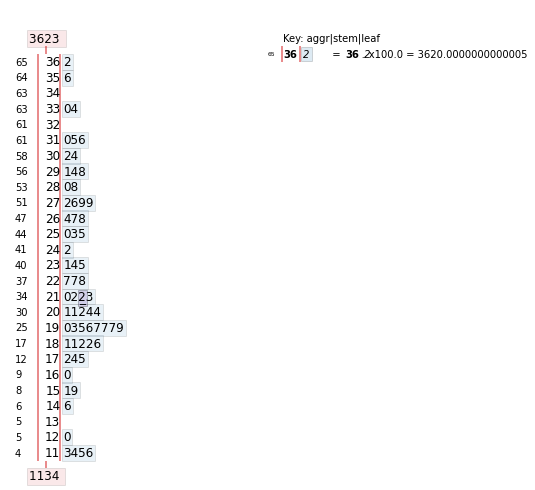

In [24]:
#@title
fig, ax = stemgraphic.stem_graphic(df1['Spot rate'])

- **Histogram**

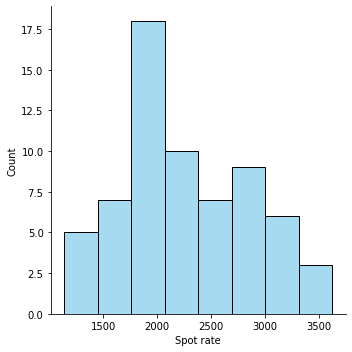

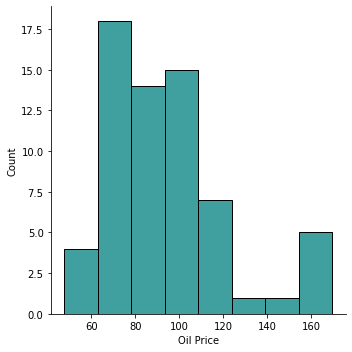

In [25]:
#@title
#fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.displot(df1['Spot rate'], kind='hist',color="skyblue", kde=False) #ax=axs[0, 0])
sns.displot(df1['Oil Price'], kind='hist', color="teal",kde=False) #ax=axs[0, 1])
#sns.kdeplot(df1['Spot rate'])

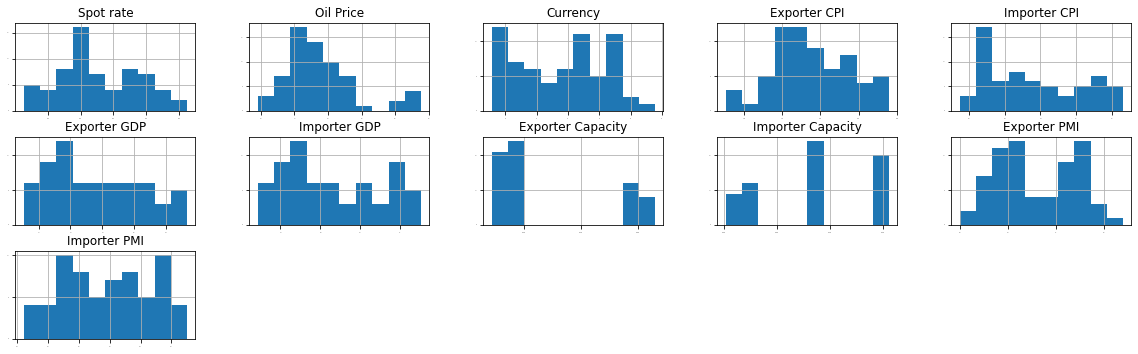

In [ ]:
#@title
df1.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, layout=(5,5), figsize=(20,10))
plt.show()

In [26]:
#@title
df1['Spot rate'].mean()-df1['Spot rate'].median()

141.52307692307704

- **The shape of the distribution**

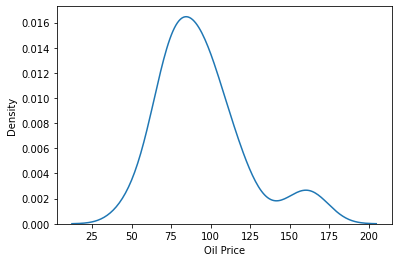

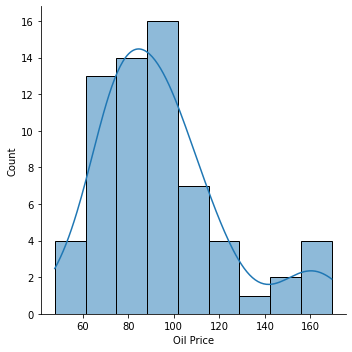

In [27]:
#@title
sns.kdeplot(df1['Oil Price'])
sns.displot(df1['Oil Price'], kind='hist',bins=9, kde=True)

#### **Multivariate Visualization**

- **Scatter plot**

<AxesSubplot: xlabel='Oil Price', ylabel='Spot rate'>

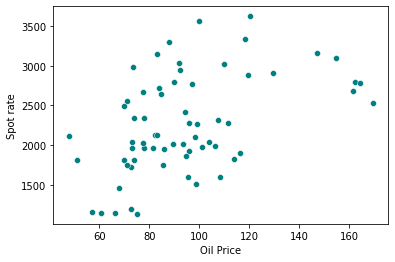

In [28]:
#@title
sns.scatterplot(data=df1, y="Spot rate", x="Oil Price", color='teal')

<AxesSubplot: xlabel='Importer CPI', ylabel='Importer GDP'>

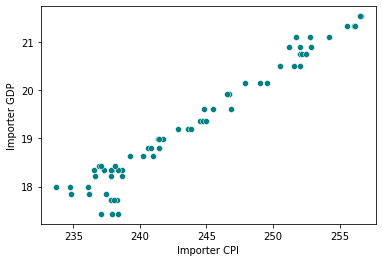

In [29]:
#@title
sns.scatterplot(data=df1, y="Importer GDP", x="Importer CPI", color='teal')

- **Line plot**

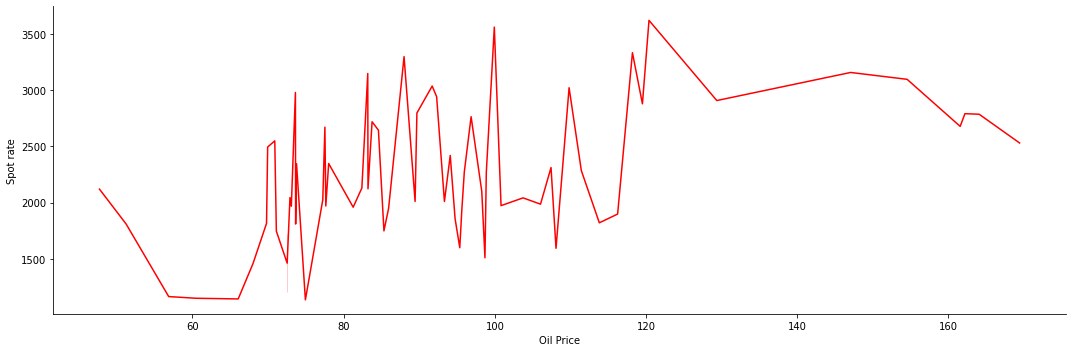

In [30]:
#@title
sns.relplot(y="Spot rate", x="Oil Price", kind='line', color='red',aspect=3,data=df1, legend='full')

- **Pair plot**: *With pairplot command in Seaborn Library we can plot the scatter plots for the entire dataset.*

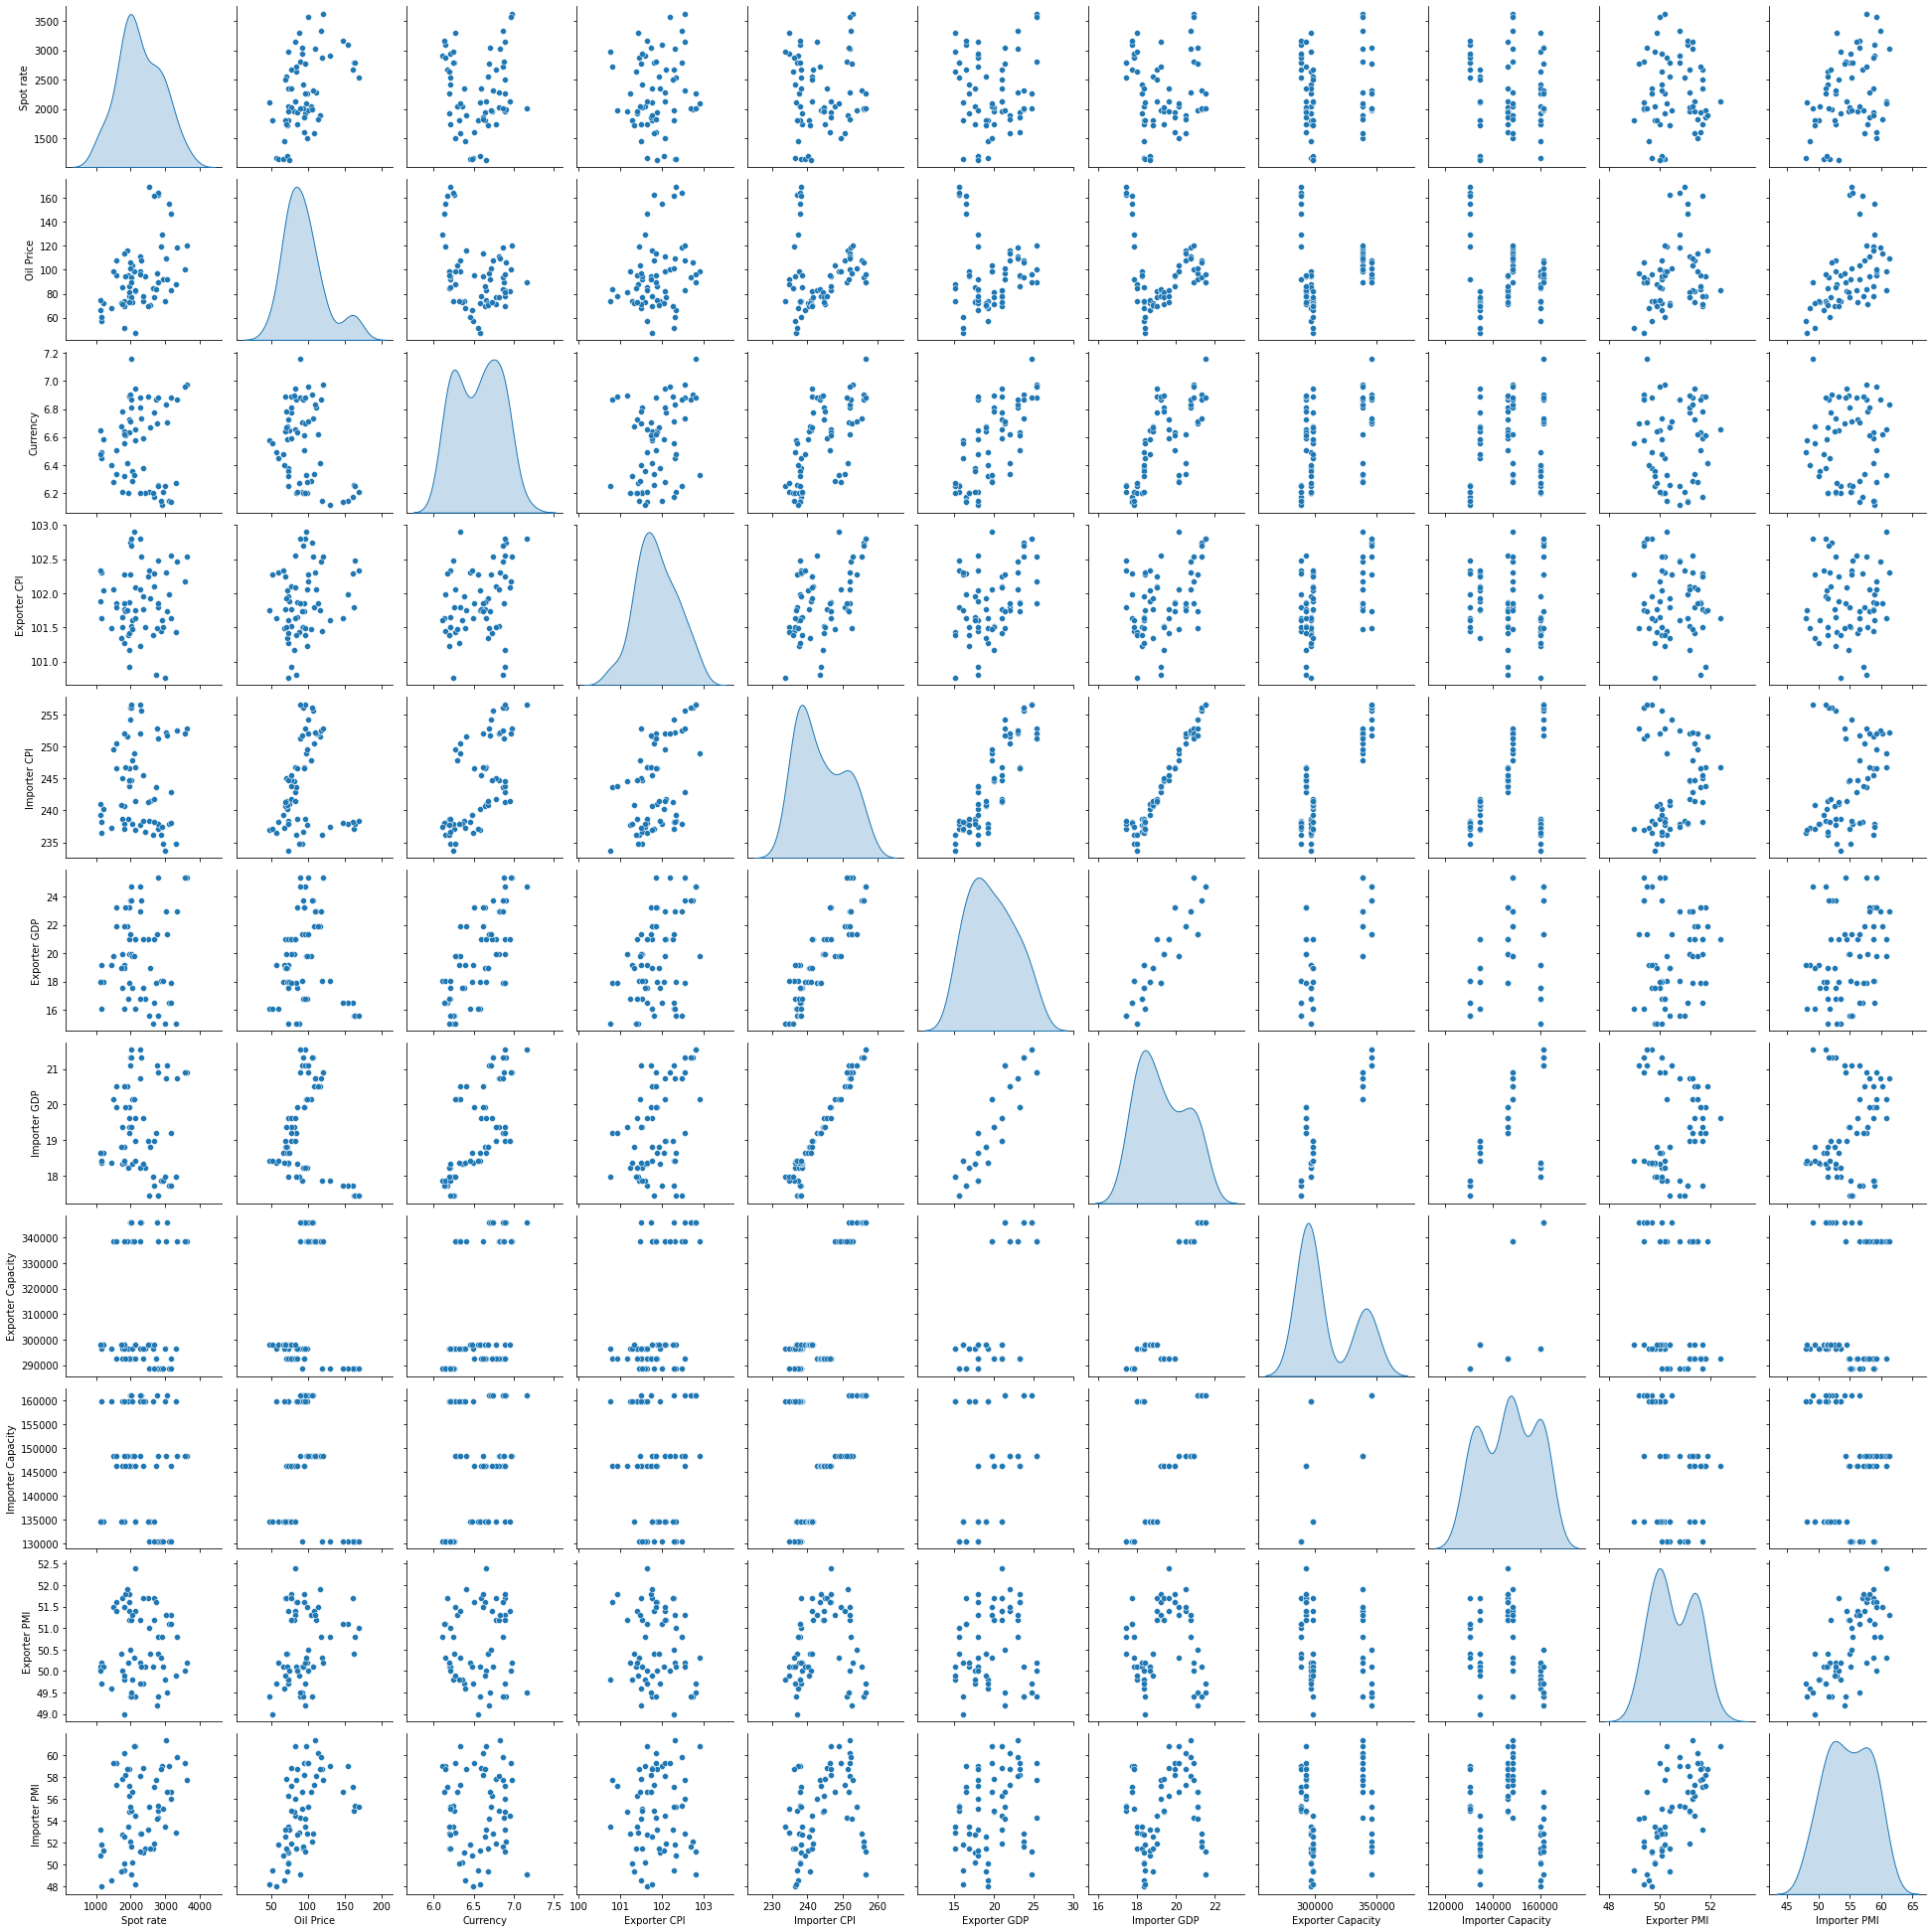

In [ ]:
#@title
sns.pairplot(df1, diag_kind="kde")

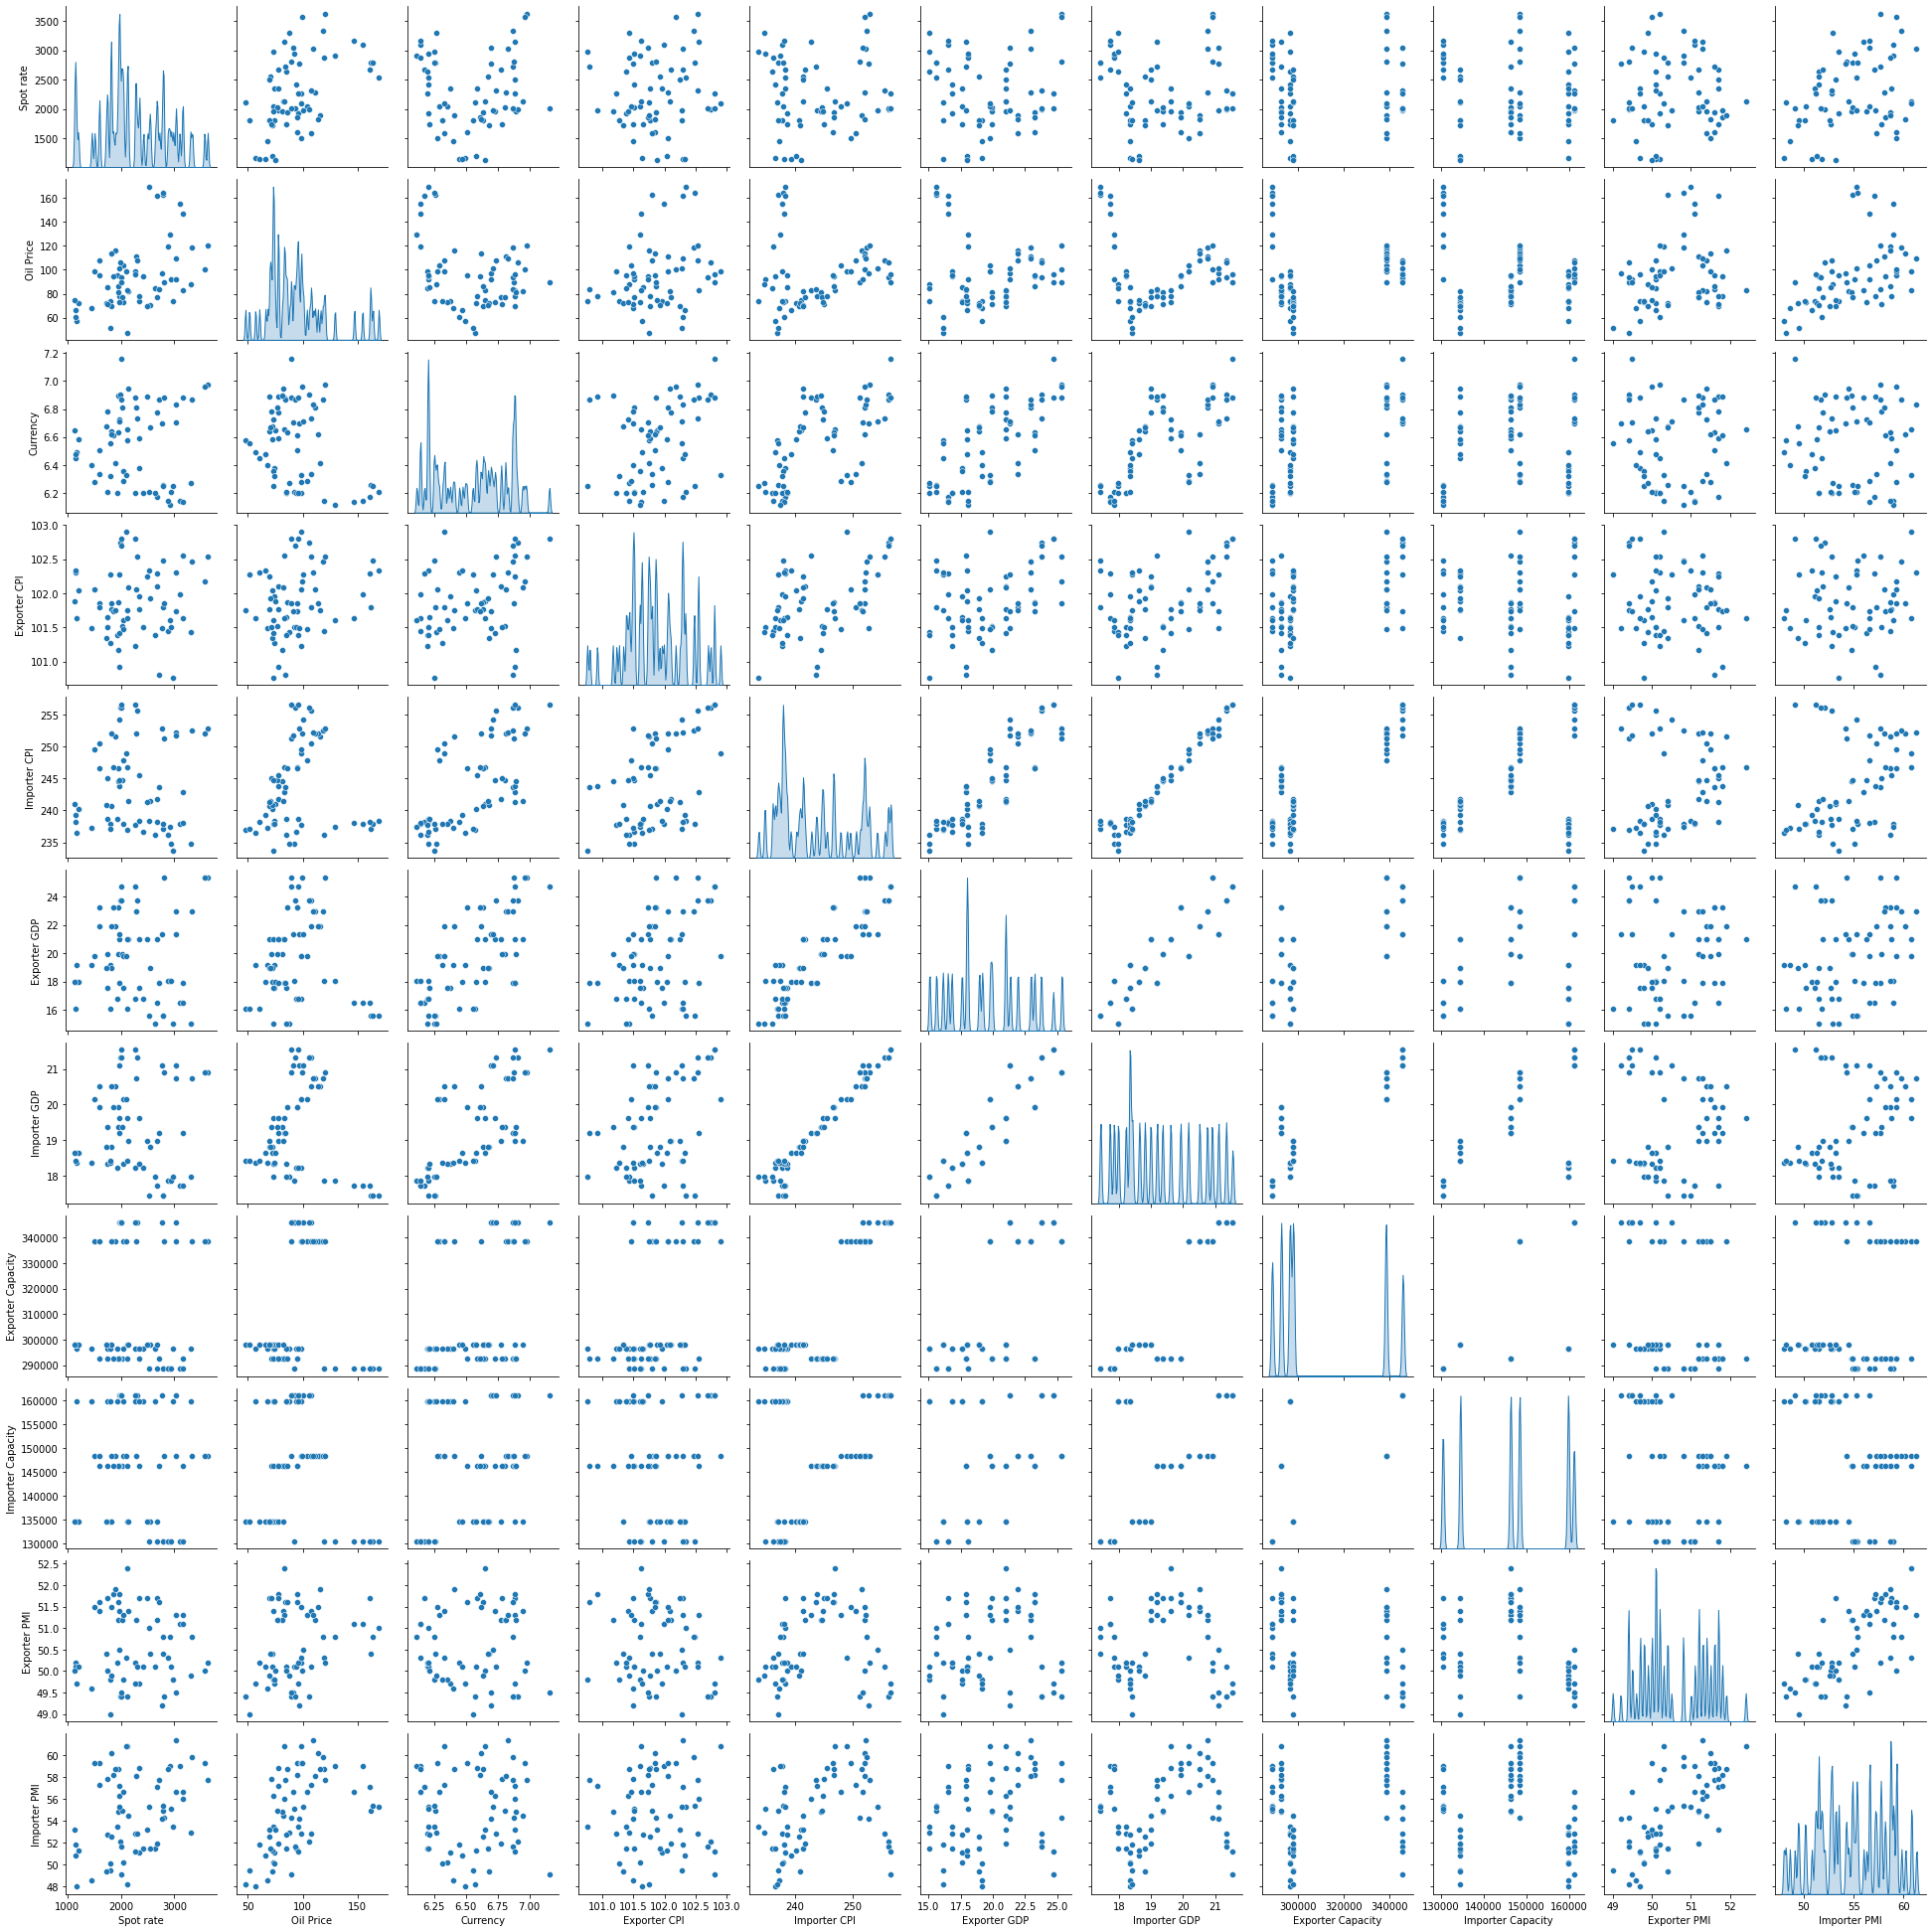

In [ ]:
#@title
sns.pairplot(df1, diag_kind="kde", diag_kws=dict(shade=True, bw_adjust=.05, vertical=False) )

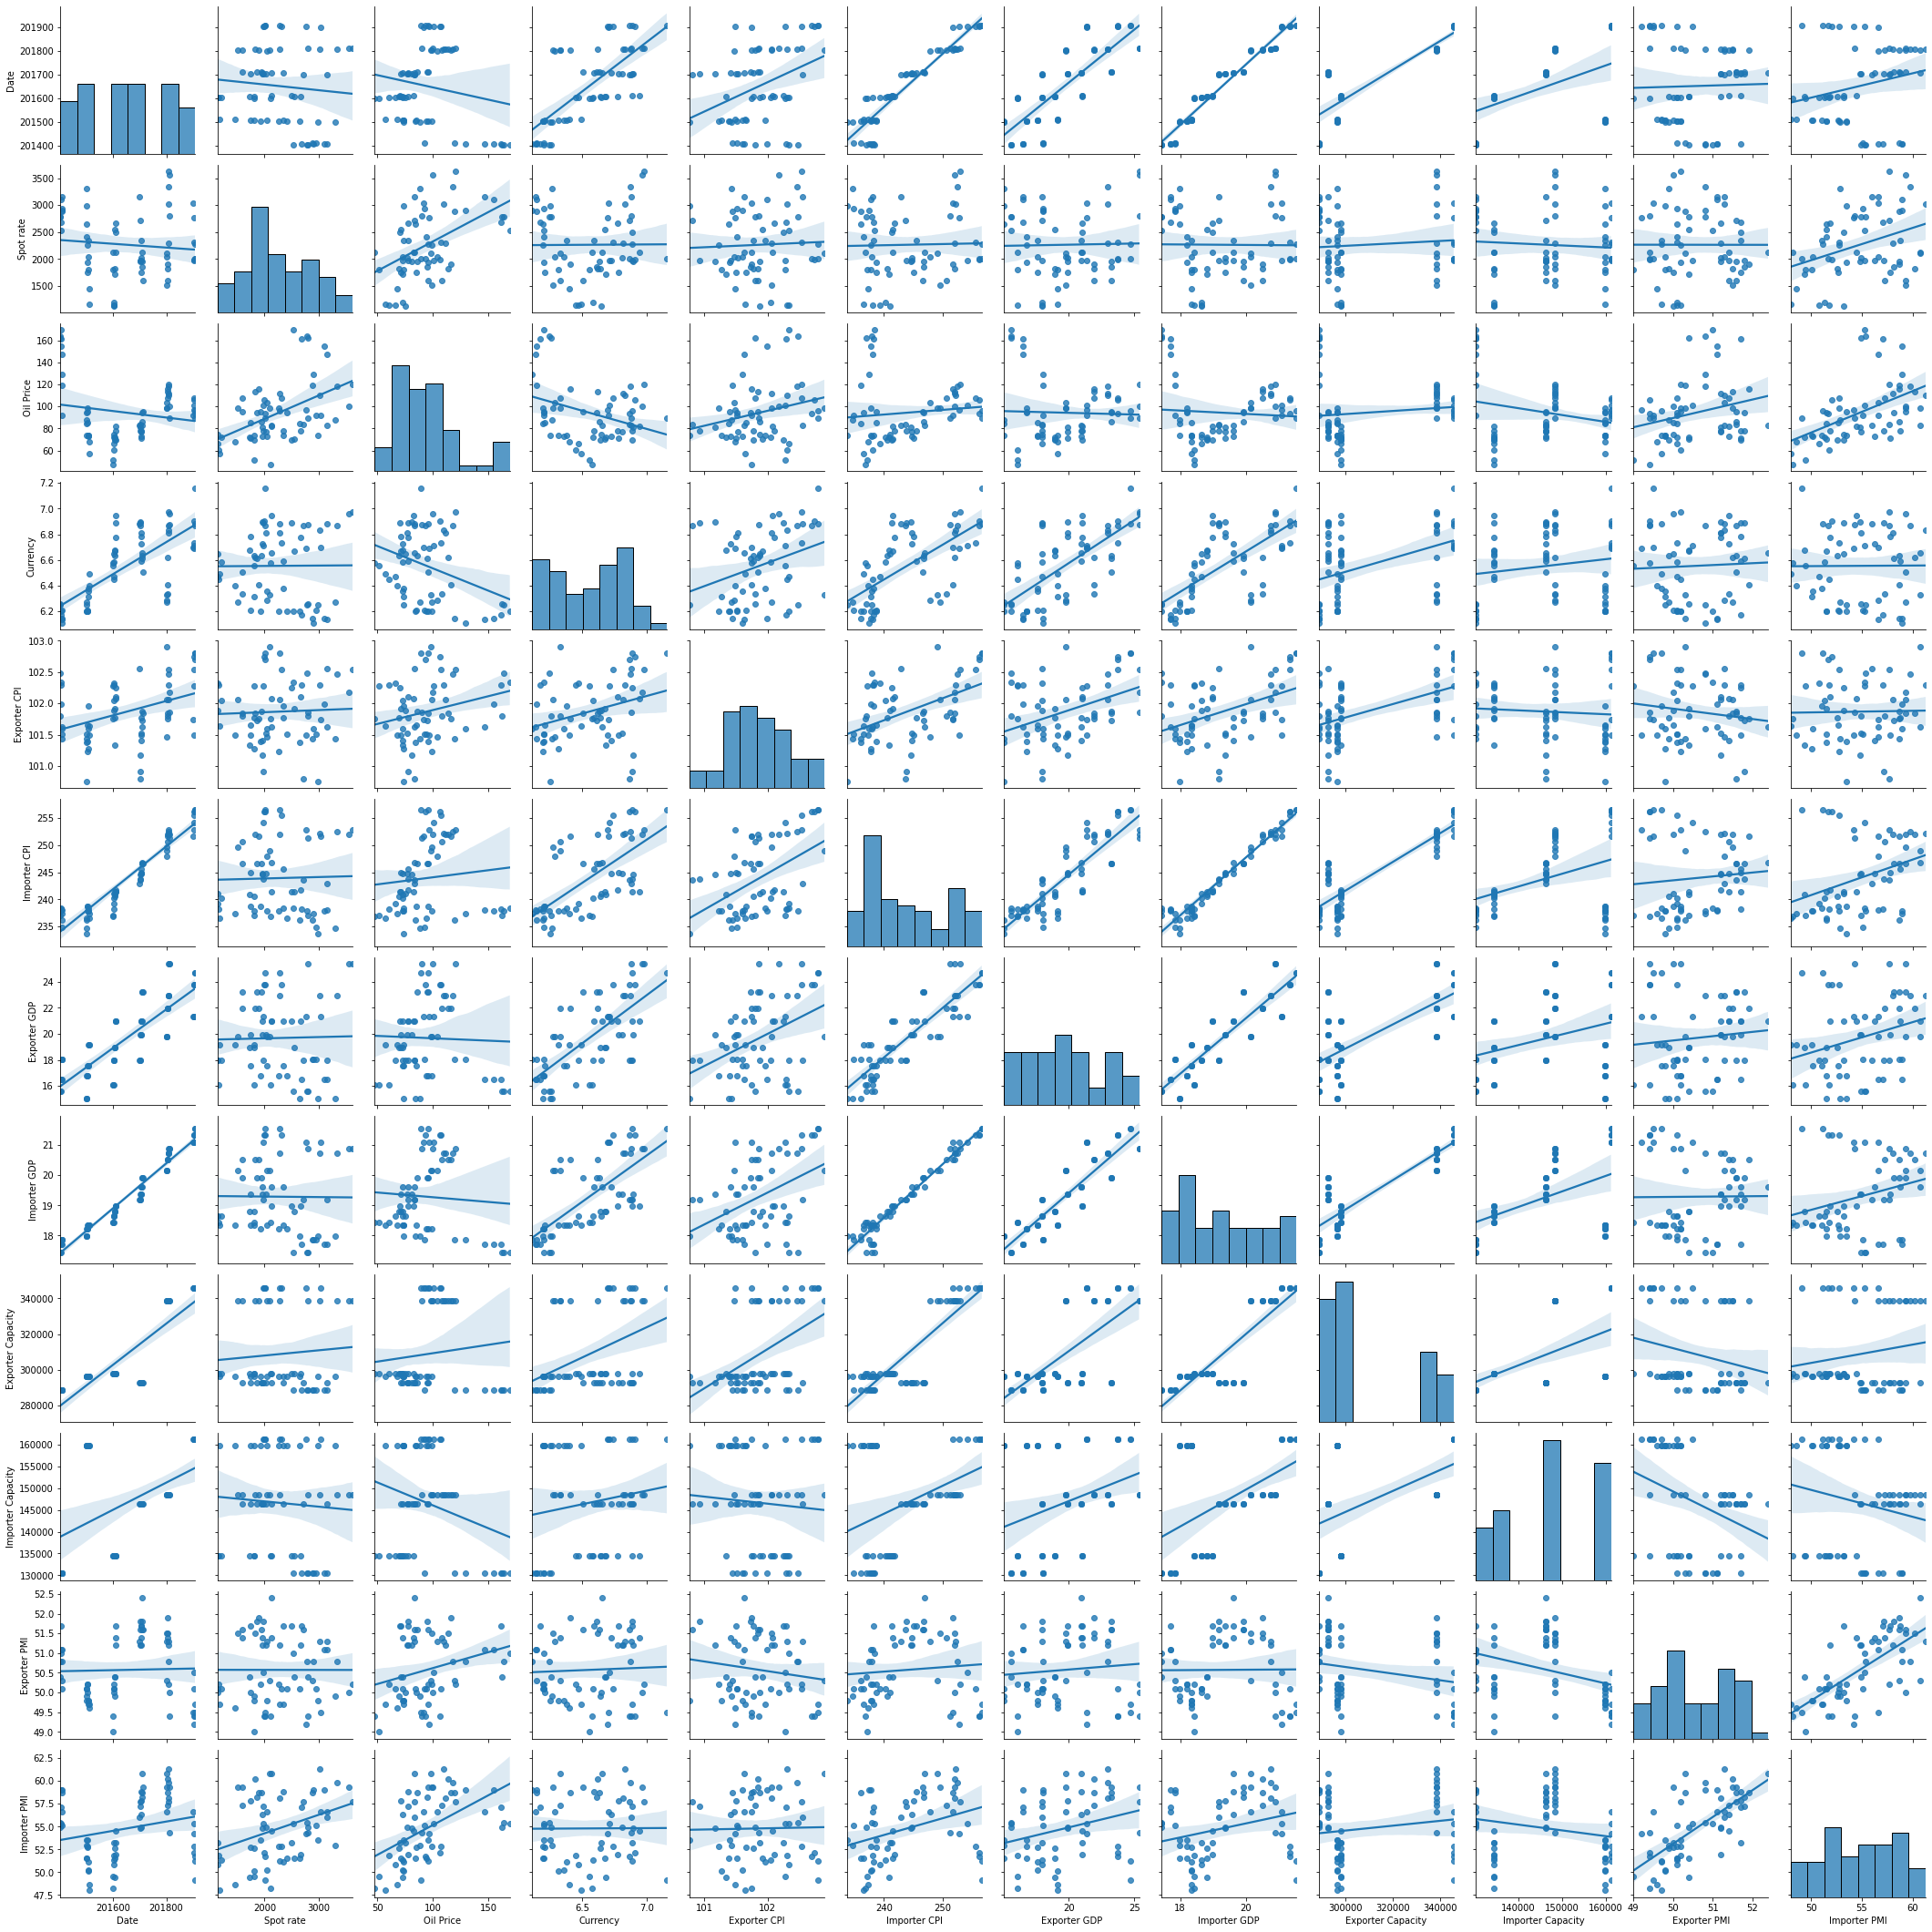

In [ ]:
#@title
sns.pairplot(df1, kind="reg")

#### **Outliers**

- **Box plots**

Box plots show the three quartile values of the distribution along with extreme values. The whiskers extend to points that lie within 1.5 IQRs of the lower and upper quartile.

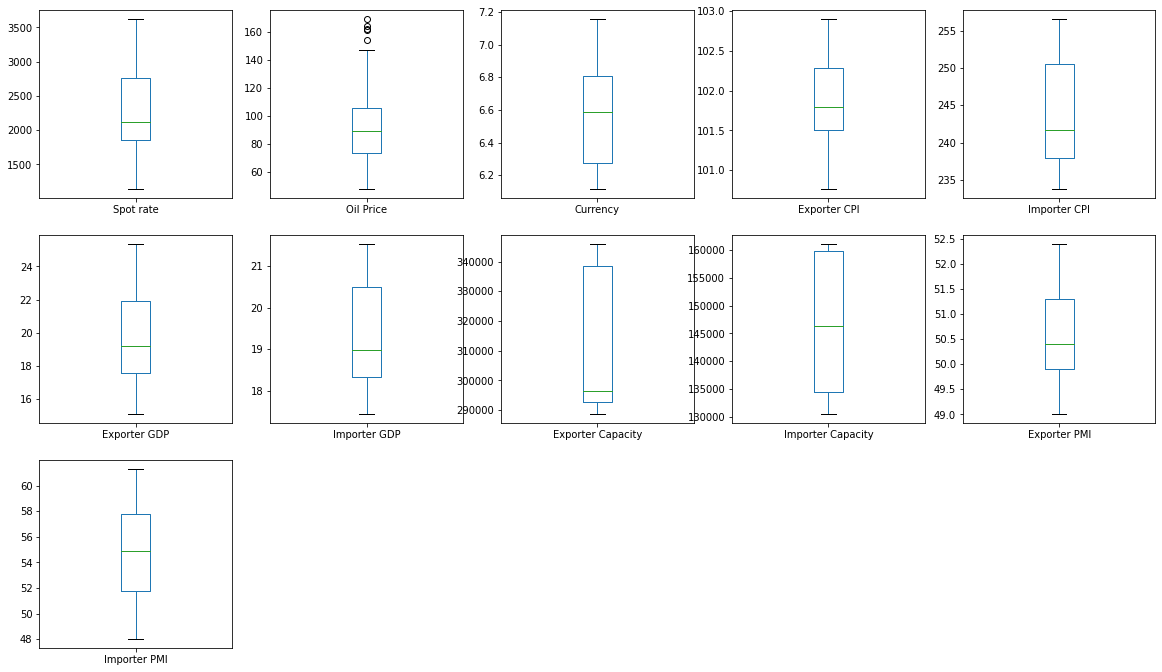

In [ ]:
df1.plot(kind='box', layout=(5,5), subplots=True, sharex=False, sharey=False, figsize=(20,20))
plt.show()

Let's find out which values are outliers.

In [35]:
#@title
df1_out = df1[((df1< (Q1 - 1.5 * IQR)) |(df1> (Q3 + 1.5 * IQR))).any(axis=1)]
pd.DataFrame(df1_out)

,Spot rate,Oil Price,Currency,Exporter CPI,Importer CPI,Exporter GDP,Importer GDP,Exporter Capacity,Importer Capacity,Exporter PMI,Importer PMI
0,2792,162.18,6.2594,101.80,237.07,15.59,17.43,288600,130400,50.4,54.9
1,2787,164.06,6.2479,102.48,237.90,15.59,17.43,288600,130400,50.8,55.4
2,2531,169.41,6.2038,102.34,238.34,15.59,17.43,288600,130400,51.0,55.3
3,2679,161.55,6.1740,102.29,238.25,16.49,17.72,288600,130400,51.7,57.1
4,3098,154.53,6.1433,101.99,237.85,16.49,17.72,288600,130400,51.1,59.0


We will take out these outliers from the dataset.

In [38]:
#@title
df1_out = df1[~((df1< (Q1 - 1.5 * IQR)) |(df1> (Q3 + 1.5 * IQR))).any(axis=1)]
pd.DataFrame(df1_out)

,Spot rate,Oil Price,Currency,Exporter CPI,Importer CPI,Exporter GDP,Importer GDP,Exporter Capacity,Importer Capacity,Exporter PMI,Importer PMI
5,3159,147.06,6.14,101.63,238.03,16.49,17.72,288600,130400,51.10,56.60
6,2909,129.36,6.11,101.60,237.43,18.02,17.85,288600,130400,50.80,59.00
7,2880,119.52,6.14,101.44,236.15,18.02,17.85,288600,130400,50.30,58.70
8,2943,92.30,6.21,101.51,234.81,18.02,17.85,288600,130400,50.10,55.10
9,2981,73.62,6.25,100.76,233.71,15.06,17.98,296400,159800,49.80,53.50
10,3300,87.99,6.27,101.43,234.72,15.06,17.98,296400,159800,49.90,52.90
11,2645,84.60,6.20,101.38,236.12,15.06,17.98,296400,159800,50.10,51.50
12,2420,94.10,6.20,101.51,236.60,16.79,18.22,296400,159800,50.10,51.50
13,2268,98.87,6.20,101.23,237.80,16.79,18.22,296400,159800,50.20,52.80
14,1932,95.63,6.20,101.39,238.64,16.79,18.22,296400,159800,50.20,53.50


#### **Correlation Analysis**

**Heat Map**

We can plot the heat map to highlight the features with high correlations.

Which two features correlate higher than 0.7?

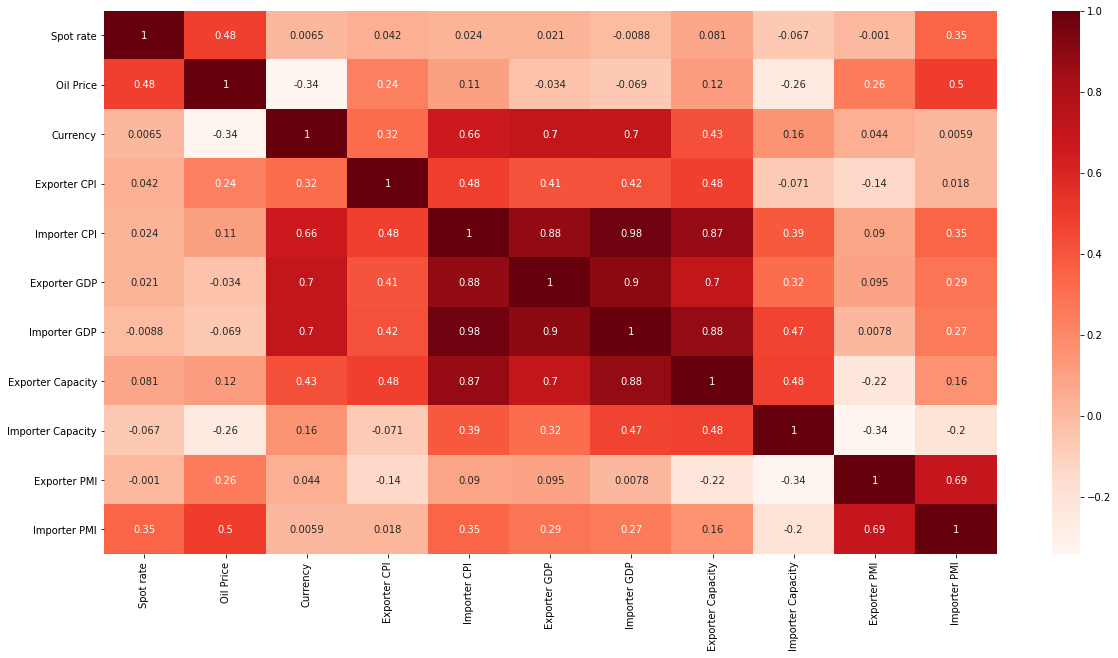

In [ ]:
#@title
plt.figure(figsize=(20,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### **Rescaling Data**

With the codes below, we use MinMaxScaler of Scikit-learn library to rescale the dataset. To learn more about MinMaxScaler function, check out this [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [32]:
!pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\artur\AppData\Local\Programs\Python\Python310\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\artur\\AppData\\Local\\Temp\\pip-install-vpjcsr5x\\sklearn_727fe839c93f4a76951e6a34137f535c\\setup.py'"'"'; __file__='"'"'C:\\Users\\artur\\AppData\\Local\\Temp\\pip-install-vpjcsr5x\\sklearn_727fe839c93f4a76951e6a34137f535c\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\artur\AppData\Local\Temp\pip-pip-egg-info-a6qmjqgg'
         cwd: C:\Users\artur\AppData\Local\Temp\pip-install-vpjcsr5x\sklearn_727fe839c93f4a76951e6a34137f535c\
    Complete output (18 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  

In [39]:
#@title
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
names = df1_out.columns
scaled_df1_out = MinMaxScaler().fit_transform(df1_out)
scaled_df1_out = pd.DataFrame(scaled_df1_out, columns=names)
pd.options.display.float_format = '{:,.2f}'.format
scaled_df1_out

,Spot rate,Oil Price,Currency,Exporter CPI,Importer CPI,Exporter GDP,Importer GDP,Exporter Capacity,Importer Capacity,Exporter PMI,Importer PMI
0,0.81,1.00,0.02,0.41,0.19,0.14,0.00,0.00,0.00,0.62,0.65
1,0.71,0.82,0.00,0.39,0.16,0.29,0.03,0.00,0.00,0.53,0.83
2,0.70,0.72,0.03,0.32,0.11,0.29,0.03,0.00,0.00,0.38,0.80
3,0.73,0.45,0.09,0.35,0.05,0.29,0.03,0.00,0.00,0.32,0.53
4,0.74,0.26,0.13,0.00,0.00,0.00,0.07,0.14,0.96,0.24,0.41
5,0.87,0.41,0.15,0.31,0.04,0.00,0.07,0.14,0.96,0.26,0.37
6,0.61,0.37,0.08,0.29,0.11,0.00,0.07,0.14,0.96,0.32,0.26
7,0.52,0.47,0.09,0.35,0.13,0.17,0.13,0.14,0.96,0.32,0.26
8,0.46,0.51,0.08,0.22,0.18,0.17,0.13,0.14,0.96,0.35,0.36
9,0.32,0.48,0.08,0.29,0.22,0.17,0.13,0.14,0.96,0.35,0.41


## **Empirical Analysis**

In many real-life problems, the relationship between variables is not deterministic and cannot be predicted perfectly.


The collection of statistical tools to explore relationships between variables that are related to a nondeterministic manner is called **regression analysis**. The widely-used regression analysis techniques:
1. Simple Linear Regression - *one predictor variable and a response variable*
2. Multiple Linear Regression - *multiple predictor variables and a response variable*



### **Simple Linear Regression**
 A single regressor x (*predictor*) and a dependent y (*response*) variable.

Suppose there is a true relationship between x and y on a straight line, where the observation of y at each level of x is a random variable.

<p align = "center"> E(Y|x) = $\beta_0 + \beta_1x$ </p>

> $\beta_0$ and $\beta_1$ are unknown regression coefficients.

> $\epsilon$ is a random variable with $\mu = 0$ and unknown variance $\sigma^2$. Random errors are uncorrelated random variables.

Regression coefficients should result in a line that is a "best fit" to the data. Assume sample size is n, then each pair of observation x and y will satisfy:

<p align = "center">  $y_i = \hat{\beta_0} + \hat{\beta_1}x_i + \epsilon_i,          i = 1,2,..n $

> **The fitted regression line:**

<p align = "center">  $\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$

Therefore, the **residual** : $\epsilon_i = y_i - \hat{y}_i$. The residual describes the error in the fit of the model for each observation *i*.

### **Multiple Linear Regression**

Multiple regressor variables (*$x_1, x_2,...,x_k$*) and one response variable *y*.

Similar to the simple linear regression equation, the multiple linear regression with *k* variables can be shown as:

<p align = "center">  $Y = \hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2 + ...+ \hat{\beta_k}x_k + \epsilon$

In this regression model, we may also combine regressors to assess their interaction effects in the model. For example:

<p align = "center">  $Y = \hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_{1,2}}x_1x_2 + \epsilon$

Consider that we have n observation (*sample size*) and k variable. We should consider the multiple regression in a matrix format since there are multiple observations for multiple variables. Then each pair of observations will satisfy:

<p align = "center"> $y_i = \hat{\beta_0} + \hat{\beta_1}x_{i,1} + \hat{\beta_2}x_{i,2} + ...+ \hat{\beta_k}x_{i,k} + \epsilon_i, i = 1,2,...n$

<p align = "center"> $y_i = \beta_0 + \sum_{j=1}^k \beta_jx_{i,j} + \epsilon_i, i = 1,2,...n$


#### **Example: Simple Linear Regression**
Let's focus on a simple dataset:

Assume that we have MPG performance and engine displacement for a sample of n = 20 cars.

In [40]:
#@title
cars = {'Make - Model':['Acura - Legend','BMW - 735i','Buick - Regal', 'Chevrolet - Cavalier','Chevrolet - Celebrity', 'Chrysler - Conquest', 'Dodge - Aries',
                 'Dodge - Dynasty', 'Ford - Escort', 'Ford - Mustang', 'Ford - Taurus', 'Ford - Tempo', 'Honda - Accord',
                 'Mazda - RX-7', 'Mercedes - 260E', 'Mercury - Tracer', 'Nissan - Maxima', 'Oldsmobile - Cutlass',
                 'Plymouth - Laser', 'Pontiac - Grand Prix'],
        'MPG':[30,19,29,32,30,24,30,28,31,25,27,33,30,23,24,29,26,29,37,29],
        'EngDis':[97,209,173,121,151,156,135,181,114,302,153,90,119,80,159,97,181,173,122,173]}

In [41]:
#@title
cars_df = pd.DataFrame(cars)
cars_df

,Make - Model,MPG,EngDis
0,Acura - Legend,30,97
1,BMW - 735i,19,209
2,Buick - Regal,29,173
3,Chevrolet - Cavalier,32,121
4,Chevrolet - Celebrity,30,151
5,Chrysler - Conquest,24,156
6,Dodge - Aries,30,135
7,Dodge - Dynasty,28,181
8,Ford - Escort,31,114
9,Ford - Mustang,25,302


c:\Users\artur\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


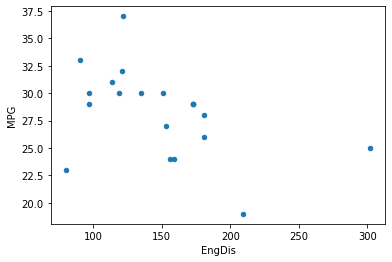

In [42]:
#@title
ax1 = cars_df.plot.scatter(x='EngDis', y='MPG')

##### **What are the regression coefficients?**

In [43]:
#@title
import statsmodels.api as sm

x = cars_df.EngDis
y = cars_df.MPG
X = sm.add_constant(x)
slr = sm.OLS(y, X).fit()
print(slr.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     4.532
Date:                Fri, 25 Aug 2023   Prob (F-statistic):             0.0473
Time:                        11:13:18   Log-Likelihood:                -53.272
No. Observations:                  20   AIC:                             110.5
Df Residuals:                      18   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.5348      2.614     12.829      0.0

In [ ]:
#@title
predictions = slr.predict(X)
predictions.to_frame()

#### **Example: Multiple Linear Regression**

Let's recall the dataset for spot rates.

In [ ]:
#@title
scaled_df1_out

Now, let's fit the data to a regression model.


In [47]:
#@title
X = scaled_df1_out[['Oil Price','Currency', 'Exporter CPI', 'Importer CPI',
       'Exporter GDP', 'Importer GDP', 'Exporter Capacity',
       'Importer Capacity', 'Exporter PMI', 'Importer PMI']]
y = scaled_df1_out['Spot rate']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Spot rate   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     9.905
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           8.21e-09
Time:                        11:23:37   Log-Likelihood:                 32.035
No. Observations:                  60   AIC:                            -42.07
Df Residuals:                      49   BIC:                            -19.03
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1490      0.11

#### **Multicollinearity**

We check multicollinearity of the dataset using the VIF method on X variables.

In [48]:
#@title
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = scaled_df1_out[['Oil Price','Currency', 'Exporter CPI', 'Importer CPI',
       'Exporter GDP', 'Importer GDP', 'Exporter Capacity',
       'Importer Capacity', 'Exporter PMI', 'Importer PMI']]
y = scaled_df1_out['Spot rate']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,21.00,Oil Price
1,11.20,Currency
2,7.90,Exporter CPI
3,312.10,Importer CPI
4,29.00,Exporter GDP
5,411.40,Importer GDP
6,25.40,Exporter Capacity
7,4.30,Importer Capacity
8,12.60,Exporter PMI
9,17.90,Importer PMI


In [52]:
#You should go one variable at a time

**Removing features with high correlation**

At this point, we try to reduce multicollinearity in our dataset. We can use the correlation heatmap that we got earlier,  shortlist the features with a high correlation, and then remove them from the list of features. We can remove them from the list of features and recalculate VIF to see how much multicollinearity has been reduced. This process can be repeated until we obtain features with VIF score of less than 5. We only consider ['Oil Pr'Currency', 'China_CPI','WC_capacity',  'EC_capacity',  'CN_PMI'] which are the features with lower correlation in the analysis in correlation section.

In [49]:
#@title
X = scaled_df1_out[['Oil Price','Currency',	'Exporter CPI','Exporter Capacity','Importer Capacity',	'Exporter PMI']]
y = scaled_df1_out['Spot rate']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,8.40,Oil Price
1,6.30,Currency
2,7.40,Exporter CPI
3,4.40,Exporter Capacity
4,3.40,Importer Capacity
5,5.80,Exporter PMI


In [51]:
#@title
X = scaled_df1_out[['Oil Price','Currency',	'Exporter CPI','Exporter Capacity','Importer Capacity',	'Exporter PMI']]
y = scaled_df1_out['Spot rate']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Spot rate   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     5.437
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           0.000193
Time:                        11:26:10   Log-Likelihood:                 13.251
No. Observations:                  60   AIC:                            -12.50
Df Residuals:                      53   BIC:                             2.159
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1752      0.13